# Lab Segmentation 2

In [2]:
from commonfunctions import *
import math
import statistics

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
def getThreshold(image):
    img = image.copy()
    if(image.max() <= 1 ):
        img = image* 255
    img = img.astype('uint8')
  
    
    hist, centers = histogram(img)
    h,w = img.shape
    t_init = round( np.sum( hist * centers) / (h*w))
    print(t_init)
    tLow  =  round( np.sum( hist[ centers < t_init] * centers[ centers < t_init]) / np.sum( hist[ centers < t_init]))
    tHigh =  round( np.sum( hist[ centers > t_init] * centers[ centers > t_init]) / np.sum( hist[ centers > t_init]))
    
    t_new= (tLow +  tHigh)/2
    
    while ( t_init != t_new): 
        t_init = t_new
        tLow  =  round( np.sum( hist[ centers < t_init] * centers[ centers < t_init]) / np.sum( hist[ centers < t_init]))
        tHigh =  round( np.sum( hist[ centers > t_init] * centers[ centers > t_init]) / np.sum( hist[ centers > t_init]))
        t_new= (tLow +  tHigh)/2

    
    return t_new if t_new < image.max() else (t_new/255)
    

119
165
156
128


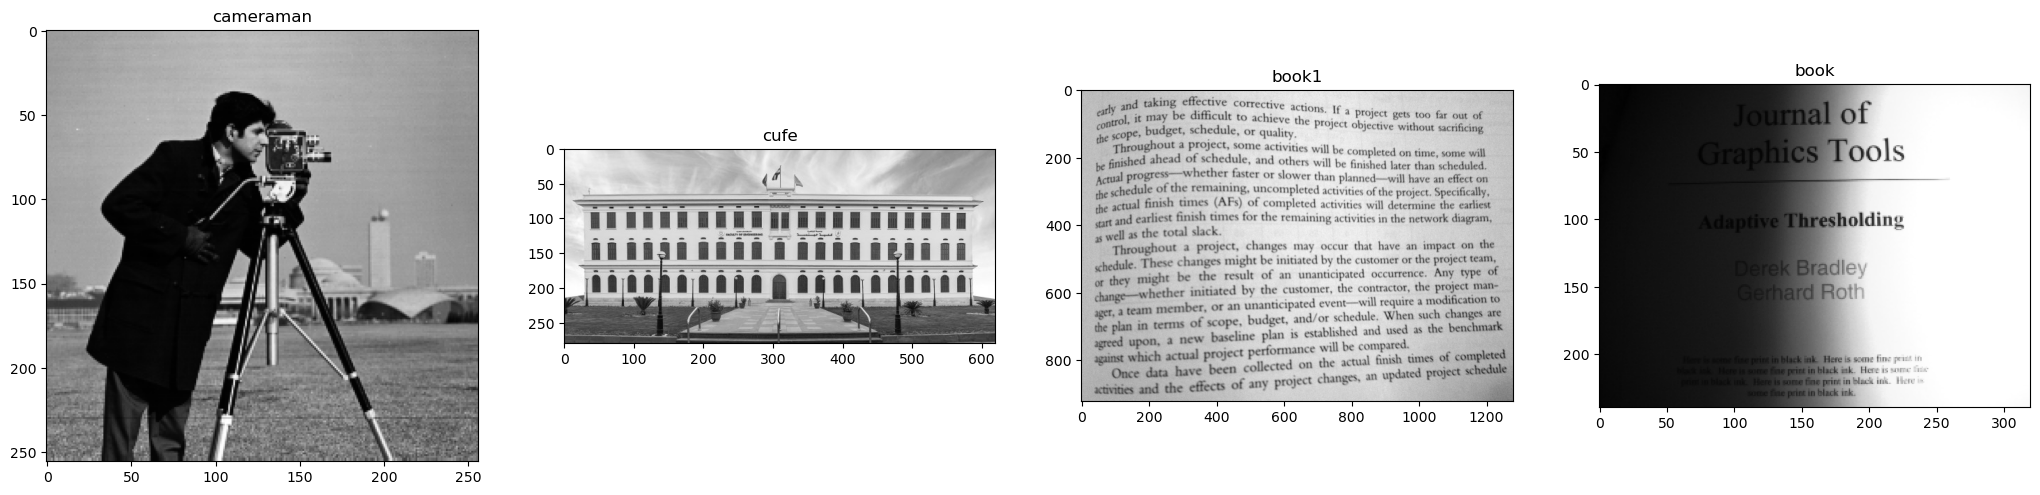

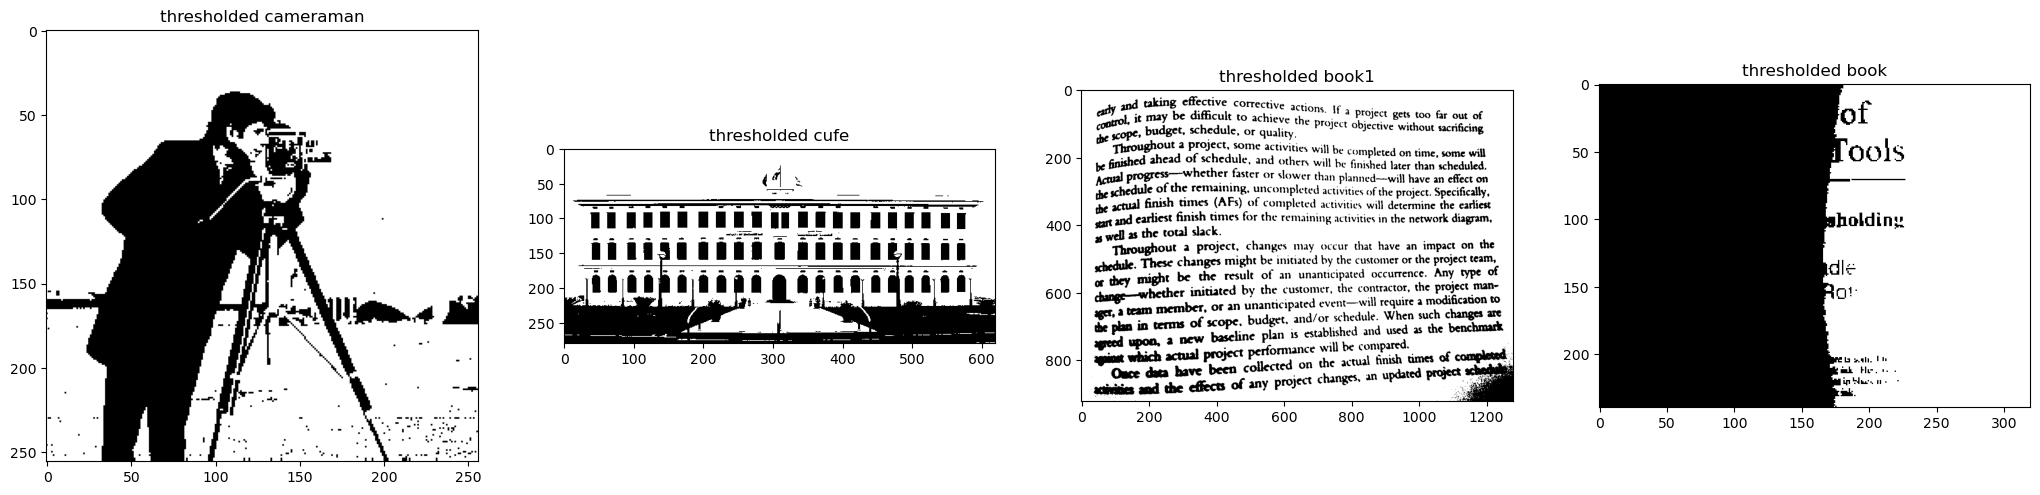

In [4]:
cameraman = io.imread('./cameraman.png', as_gray= True)
cufe = io.imread('./cufe.png', as_gray= True)
book1 = io.imread('./book1.png', as_gray= True)
book = io.imread('./book.png', as_gray= True)

cameraman_bin = np.copy(cameraman)
cufe_bin =  np.copy(cufe)
book1_bin =  np.copy(book1)
book_bin =  np.copy(book)

cameraman_thresh = getThreshold(cameraman)
cufe_thresh = getThreshold(cufe)
book1_thresh = getThreshold(book1)
book_thresh = getThreshold(book)


cameraman_bin = cameraman > cameraman_thresh
cufe_bin = cufe > cufe_thresh
book1_bin = book1 > book1_thresh
book_bin = book > book_thresh



show_images([cameraman, cufe, book1, book], ['cameraman', 'cufe', 'book1', 'book'])
show_images([cameraman_bin, cufe_bin, book1_bin, book_bin], ['thresholded cameraman', 'thresholded cufe', 'thresholded book1', 'thresholded book'])



27
32
224
230


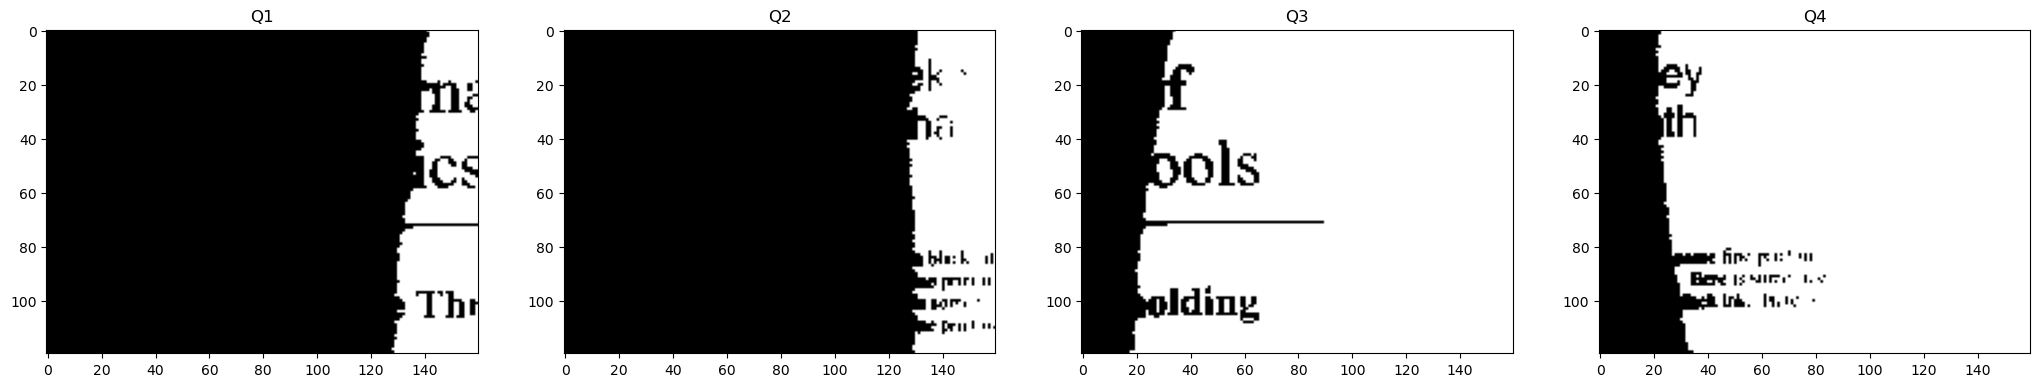

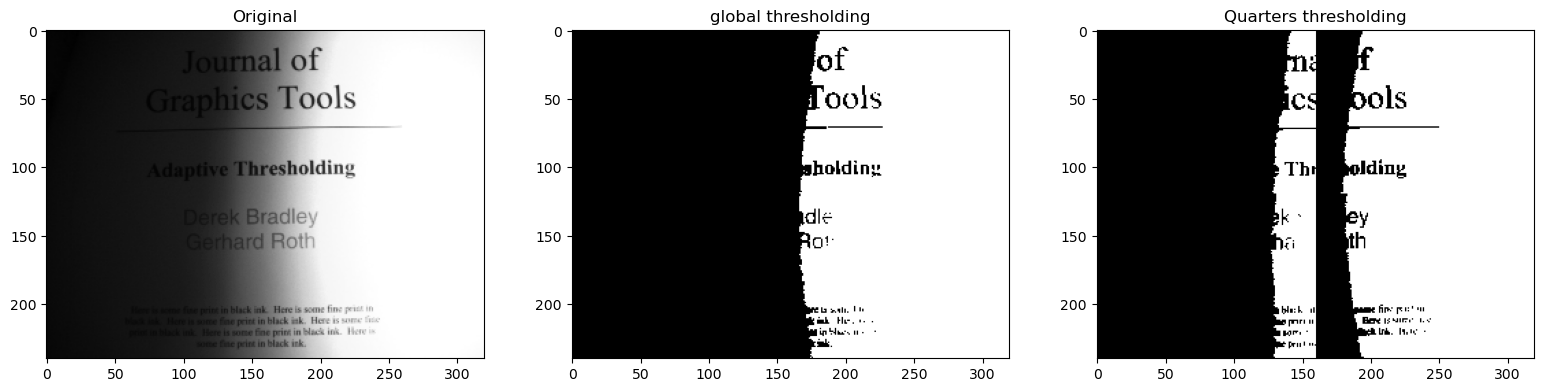

In [5]:
heigth = book.shape[1]
width = book.shape[0]
halfs = np.split(book, 2, axis=1)
halfs= np.array(halfs)

q1= np.split(halfs[0],2, axis =0)
q2= np.split(halfs[1],2, axis =0)

qs = np.array([q1,q2])

for i in range(2):
    for j in range(2):
        ths = getThreshold(qs[i][j])
        qs[i][j] = qs[i][j]>ths


show_images([qs[0][0], qs[0][1], qs[1][0], qs[1][1]], ['Q1', 'Q2', 'Q3', 'Q4'])


halfs [0] = np.concatenate((qs[0][0], qs[0][1]))
halfs [1] = np.concatenate((qs[1][0], qs[1][1]))
result = np.concatenate((halfs[0], halfs[1]), axis = 1)
show_images([book,book_bin, result], ['Original', 'global thresholding', 'Quarters thresholding'])

